# Homework 1

##### 11 February 2021
##### Stacey Xiang

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

### Problem 1a

In [10]:
def f(x):
    '''
    Function to be integrated by adap_simps. Returns the value of the function at x.
    param x: float
    returns: float
     * WARNING - if x = 0, f(x) will try to divide by 0 and break.
    '''
    return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)

In [6]:
def adap_simps(f, start, stop, accuracy):
    '''
    Numerically calculates the integral of f from start to stop with a specified accuracy.
    param f: function taking one value x and returning the value of some function at x
    param start: float. The lower limit of the integral
    param stop: float. The upper limit of the integral
    param accuracy: float. The desired accuracy of the integral
    returns: float
    '''
    error = 1
    h = 0.1 # Step size
    x = np.arange(start, stop + h, h)
    
    S0 = (1/3) * (f(start) + f(stop) + 2*(f(x[2:-3:2]).sum()))
    T0 = (2/3) * (f(x[1:-2:2]).sum())
    F0 = h * (S0 + 2*T0)
    
    S_list = [S0]
    T_list = [T0]
    F_list = [F0]
    
    while (error > accuracy):
        h = h/2
        x = np.arange(start, stop + h, h)
        
        S = S_list[-1] + T_list[-1]
        T = (2/3) * (f(x[1:-2:2]).sum())
        F = h * (S + 2*T)
        
        S_list.append(S)
        T_list.append(T)
        F_list.append(F)
        
        error = (1/15) * (F_list[-1] - F_list[-2])
        
    return F_list[-1]
        

In [7]:
# Testing adap_simps

start = 0.001
stop = 10
x_list = np.arange(start, stop, 0.001)
f_list = f(x_list)
actual = integrate.simpson(f_list, x_list)
mine = adap_simps(f, start, stop, 0.001)
print("Expected value of integral: " + str(actual))
print("adap_simps integral: " + str(mine))

Expected value of integral: 25.273213499916608
adap_simps integral: 25.260416826500318


In [11]:
def calc_Cv(density, volume, molar_mass, deb_temp, temp_upper, accuracy):
    '''
    Calculates the quantity C_v for a given material and temperature.
    param density: the density of the material in g/cc
    param volume: the volume of the material in cc
    param deb_temp: the Debye temperature of the material
    param temp_upper: the temperature upper limit
    param accuracy: the required accuracy of the formula's integral
    returns: float
    '''
    k = 1.38 * 10**(-23)
    avogadro = 6.022 * 10**(23)
    N = ((density * volume) / molar_mass) * avogadro
    
    T_list = np.arange(0.001, temp_upper, 1)
    Cv_list = []
    
    for T in T_list:
        Cv = 9 * k * N * (T/deb_temp)**3 * adap_simps(f, 0.001, (deb_temp/T), accuracy)
        Cv_list.append(Cv)
        
    Cv_list = np.array(Cv_list)
    
    return T_list, Cv_list

### Problem 1b

<ipython-input-10-b186d77d55f6>:7: RuntimeWarning: overflow encountered in exp
  return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)
<ipython-input-10-b186d77d55f6>:7: RuntimeWarning: invalid value encountered in double_scalars
  return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)
<ipython-input-10-b186d77d55f6>:7: RuntimeWarning: overflow encountered in multiply
  return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)
<ipython-input-10-b186d77d55f6>:7: RuntimeWarning: overflow encountered in square
  return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)
<ipython-input-10-b186d77d55f6>:7: RuntimeWarning: invalid value encountered in true_divide
  return ((x**4)*(np.exp(x))) / ((np.exp(x) - 1)**2)


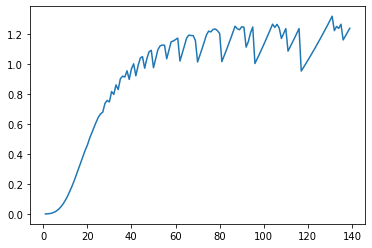

In [12]:
# Lead
Pb_T, Pb_Cv = calc_Cv(11.35, 1, 207.2, 105, 140, 0.001)

# Aluminum
#Al_T, Al_Cv = calc_Cv(2.7, 1, 26.98, 428, 300, 0.001)

# Diamond
#Di_T, Di_Cv = calc_Cv(3.51, 1, 12.01, 2230, 300, 0.001)

plt.plot(Pb_T, Pb_Cv)
#plt.plot(Al_T, Al_Cv)
#plt.plot(Di_T, Di_Cv)

### RK-4 integrator for problems 2-4

In [8]:
def RK4(g, dt, start, stop, x0):
    '''
    Approximates the solution to a differential equation using the Runge-Kutta 4 method.
    param g: dx/dt as a function of x and t
    param dt: timestep size
    param start: start time
    param stop: stop time
    param x0: initial value of x
    returns: numpy arrays of time and x
    '''
    t_list = np.arange(start, stop + dt, dt)
    x_list = np.zeros(t_list.size)
    x_list[0] = x0
    
    for i in range(1, t_list.size):
        x = x_list[i-1]
        t = t_list[i-1]
        
        k1 = dt * g(x, t)
        k2 = dt * g(x + 0.5*k1, t + 0.5*dt)
        k3 = dt * g(x + 0.5*k2, t + 0.5*dt)
        k4 = dt * g(x + 0.5*k3, t + 0.5*dt)
        
        x_list[i] = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        
    return t_list, x_list

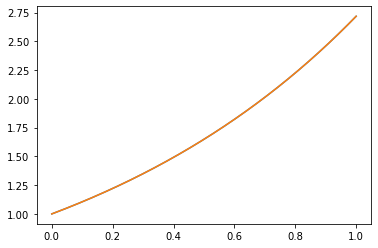

In [9]:
# Testing RK4

def g(x, t):
    return x

t_list, x_list = RK4(g, 0.001, 0, 1, 1)
plt.plot(t_list, x_list)
plt.plot(t_list, np.e**(t_list))

In [13]:
def RK4_step(g, dt, x):
    '''Performs one RK4 step.
    param g: dx/dt as a function of x and t
    param dt: timestep size
    x: value of x at previous timestep
    return: float'''
    k1 = dt * g(x, t)
    k2 = dt * g(x + 0.5*k1, t + 0.5*dt)
    k3 = dt * g(x + 0.5*k2, t + 0.5*dt)
    k4 = dt * g(x + 0.5*k3, t + 0.5*dt)
    return x + (k1 + 2*k2 + 2*k3 + k4) / 6

### Problem 3a

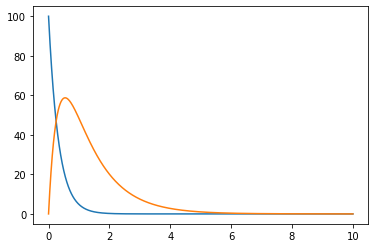

In [24]:
# RK4 integrator for 2 coupled populations

start = 0
stop = 10
dt = 0.01
Na0 = 100
Nb0 = 0
Ta = 0.33
Tb = 1

t_list = np.arange(start, stop + dt, dt)
Na_list = np.zeros(t_list.size)
Nb_list = np.zeros(t_list.size)
Na_list[0] = Na0
Nb_list[0] = Nb0

for i in range(1, t_list.size):
    Na = Na_list[i-1]
    Nb = Nb_list[i-1]
    t = t_list[i-1]
    
    Nak1 = dt * (-Na/Ta)
    Nak2 = dt * (-(Na + 0.5*Nak1)/Ta)
    Nak3 = dt * (-(Na + 0.5*Nak2)/Ta)
    Nak4 = dt * (-(Na + 0.5*Nak3)/Ta)
    Na_list[i] = Na + (Nak1 + 2*Nak2 + 2*Nak3 + Nak4) / 6
    
    Nbk1 = dt * ((Na/Ta) - (Nb/Tb))
    Nbk2 = dt * ((Na/Ta) - ((Nb + 0.5*Nbk1)/Tb))
    Nbk3 = dt * ((Na/Ta) - ((Nb + 0.5*Nbk2)/Tb))
    Nbk4 = dt * ((Na/Ta) - ((Nb + 0.5*Nbk3)/Tb))
    Nb_list[i] = Nb + (Nbk1 + 2*Nbk2 + 2*Nbk3 + Nbk4) / 6
    
plt.plot(t_list, Na_list)
plt.plot(t_list, Nb_list)
plt.savefig("Ta.33.png")
    

### Problem 4a

In [14]:
def drag_function(Cd, A, vx, vy):
    '''Calculates the drag forces in the x and y directions
    param Cd: drag coefficient
    param A: cross sectional area
    param vx: velocity in the x direction
    param vy: velocity in the y direction
    returns: x drag force, y drag force (floats)'''
    v = np.sqrt(vx**2 + vy**2)
    total_drag = -0.5 * Cd * A * v**2
    x_drag = total_drag * (vx/v)
    y_drag = total_drag * (vy/v)
    return x_drag, y_drag

In [15]:
# Testing drag_function
drag_function(0.3, (3.7**2) * np.pi, 12, 15)

(-1487.096012164531, -1858.8700152056638)

In [ ]:
def baseball(v0, theta):
    '''Calculates the position, velocity, and acceleration of a baseball in 2 dimensions with
    air resistance.
    param v0: initial velocity
    param theta: launch angle
    returns 3 numpy arrays: x position, y position, and time
    '''
    g = 9.8
    Cd = 0.3
    m = 0.15
    A = (3.7**2) * np.pi
    dt = 0.01
    
    x_list = [0]
    y_list = [1]
    vx_list = [v0 * np.cos(theta)]
    vy_list = [v0 * np.sin(theta)]
    ax_list = [0]
    ay_list = [0]
    t_list = [0]
    
    while y_list[-1] > 0:
        x = x_list[-1]
        y = y_list[-1]
        vx = vx_list[-1]
        vy = vy_list[-1]
        ax = ax_list[-1]
        ay = ay_list[-1]
        
        
        x_list.append(vx * dt)
        y_list.append(vy * dt)
        
        # RK4 to find next vx
        k1, other = dt * drag_function(Cd, A, vx, vy)
        
        